<a href="https://colab.research.google.com/github/ShaktiMS/MLDL-expt-1/blob/main/Expt_1_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('advertising.csv')

In [ ]:
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (1000, 10)
   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0 

In [ ]:
data = df.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)

In [ ]:
X = data.drop('Clicked on Ad', axis=1)
y = data['Clicked on Ad']

In [ ]:
# (Train: 70%, Test: 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
print("\n--- Model Evaluation ---")
print(f"Accuracy Score: {accuracy_score(y_test, predictions)*100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))


--- Model Evaluation ---
Accuracy Score: 97.67%

Confusion Matrix:
[[155   2]
 [  5 138]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



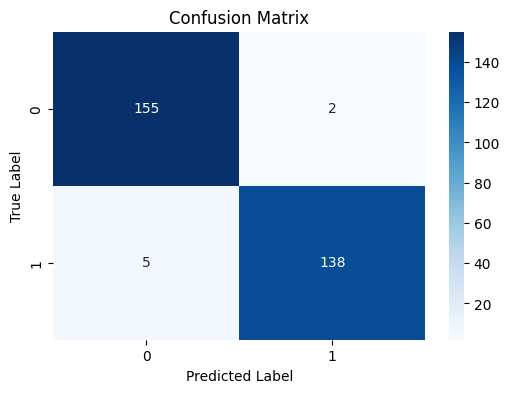

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## **Hyperparameter Tuning**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],   # Various strengths
    'penalty': ['l1', 'l2'],                     # Lasso vs Ridge
    'solver': ['liblinear']                      # 'liblinear' works well for small datasets and supports both L1/L2
}

In [ ]:
logmodel = LogisticRegression()

In [ ]:
grid_search = GridSearchCV(estimator=logmodel, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

In [ ]:
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)

Starting Grid Search...
Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [ ]:
print("\n--- Best Parameters Found ---")
print(grid_search.best_params_)
print(f"Best Cross-Validation Score: {grid_search.best_score_*100:.2f}%")


--- Best Parameters Found ---
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 96.71%


In [ ]:
best_model = grid_search.best_estimator_
grid_predictions = best_model.predict(X_test)

print("\n--- Final Tuned Model Evaluation ---")
print(f"Accuracy Score: {accuracy_score(y_test, grid_predictions)*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, grid_predictions))


--- Final Tuned Model Evaluation ---
Accuracy Score: 97.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

